## Problem statement

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Project\First-Phase-Practice-Projects--1-\New folder\dataset.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Columns

In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance


#### Analising basic metrics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- From above analysis it seems that there are no null values

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

- from above analysis we can say that sex,children,smoker and region are categorical data
- age, bmi and charges are continous data

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- from above analysis we can say that there is almost no or very less skeweness (Normally distributed), since mean is almost equal to median

### Univariate analysis

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

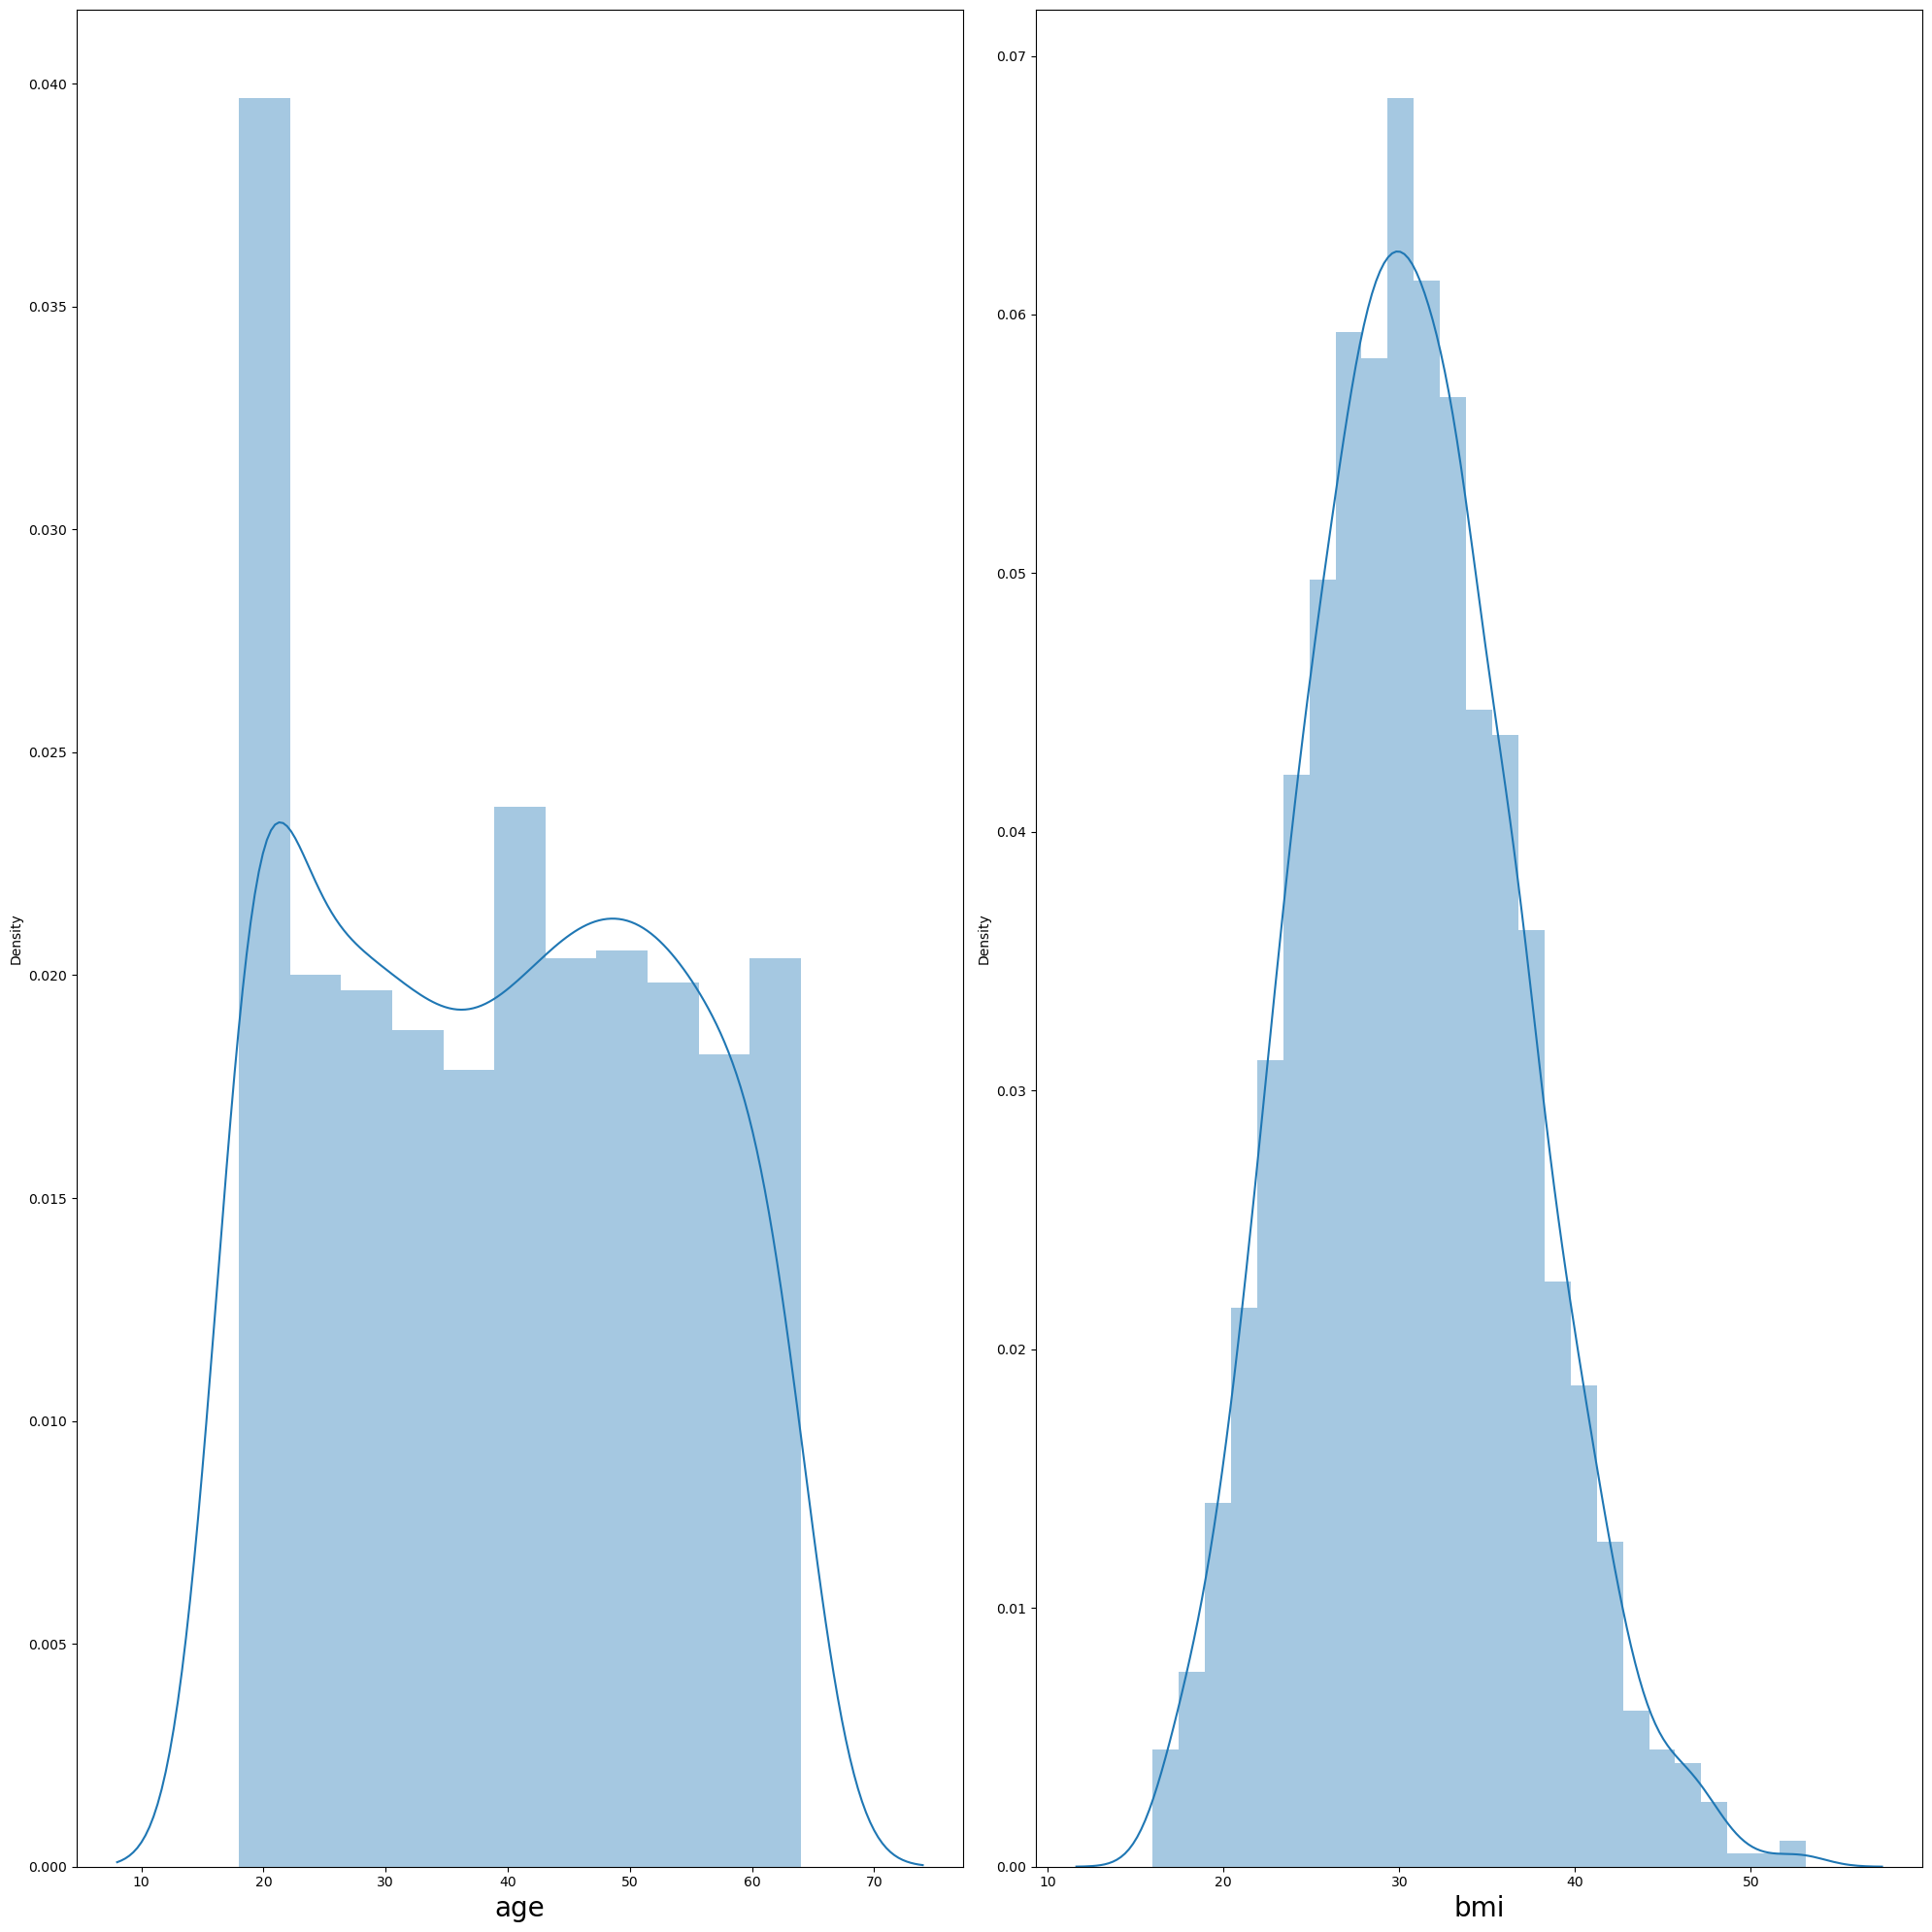

In [12]:
plt.figure(figsize=(20,20))

    
sns.distplot(df['age'],ax=plt.subplot(1,2,1))
plt.xlabel('age',fontsize = 20)
sns.distplot(df['bmi'],ax=plt.subplot(1,2,2))
plt.xlabel('bmi',fontsize = 20)
    
plt.tight_layout()  

Above graphs seems almost normally distributed

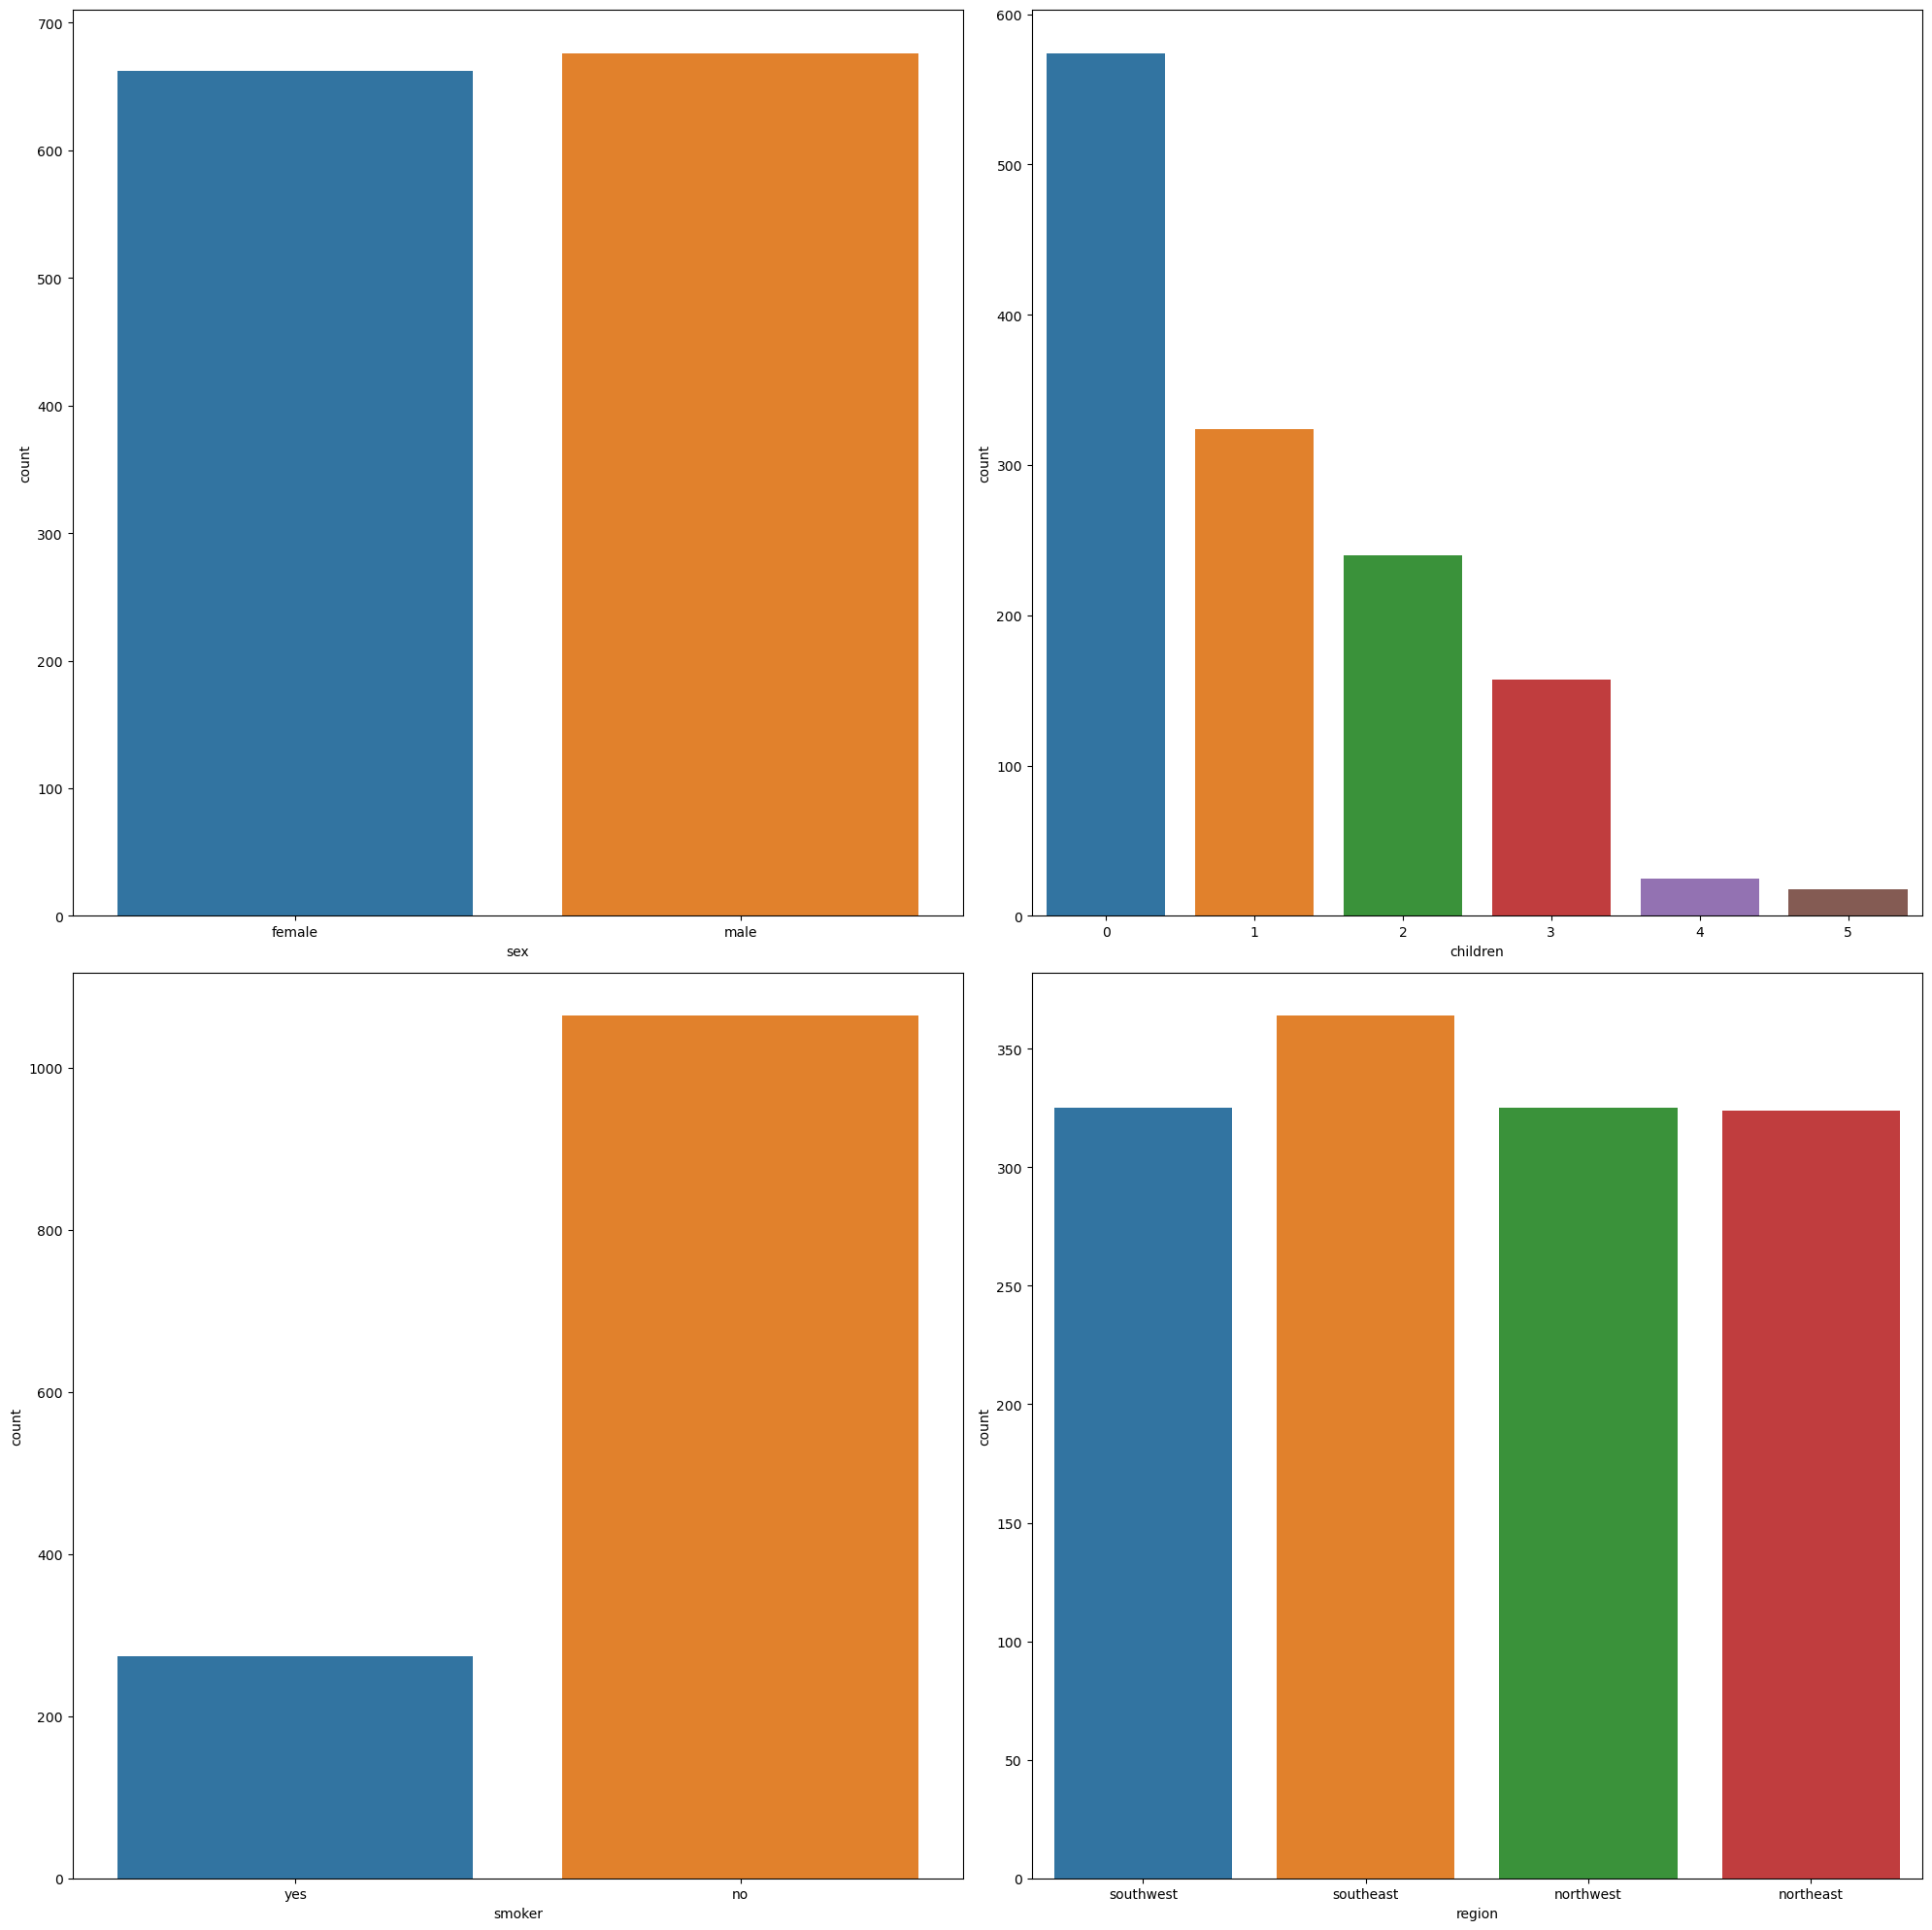

In [13]:
plt.figure(figsize=(20,20))

sns.countplot(df,x='sex',ax=plt.subplot(2,2,1))
sns.countplot(df,x='children',ax=plt.subplot(2,2,2))
sns.countplot(df,x='smoker',ax=plt.subplot(2,2,3))
sns.countplot(df,x='region',ax=plt.subplot(2,2,4))
plt.tight_layout()

- we can observe that region and sex are almost equally distributes
- number of non smokers is very high as compared to no of smokers
- there is gradual dicrease in count of dependents i.e more people are having 0 children and least people are having 5 children

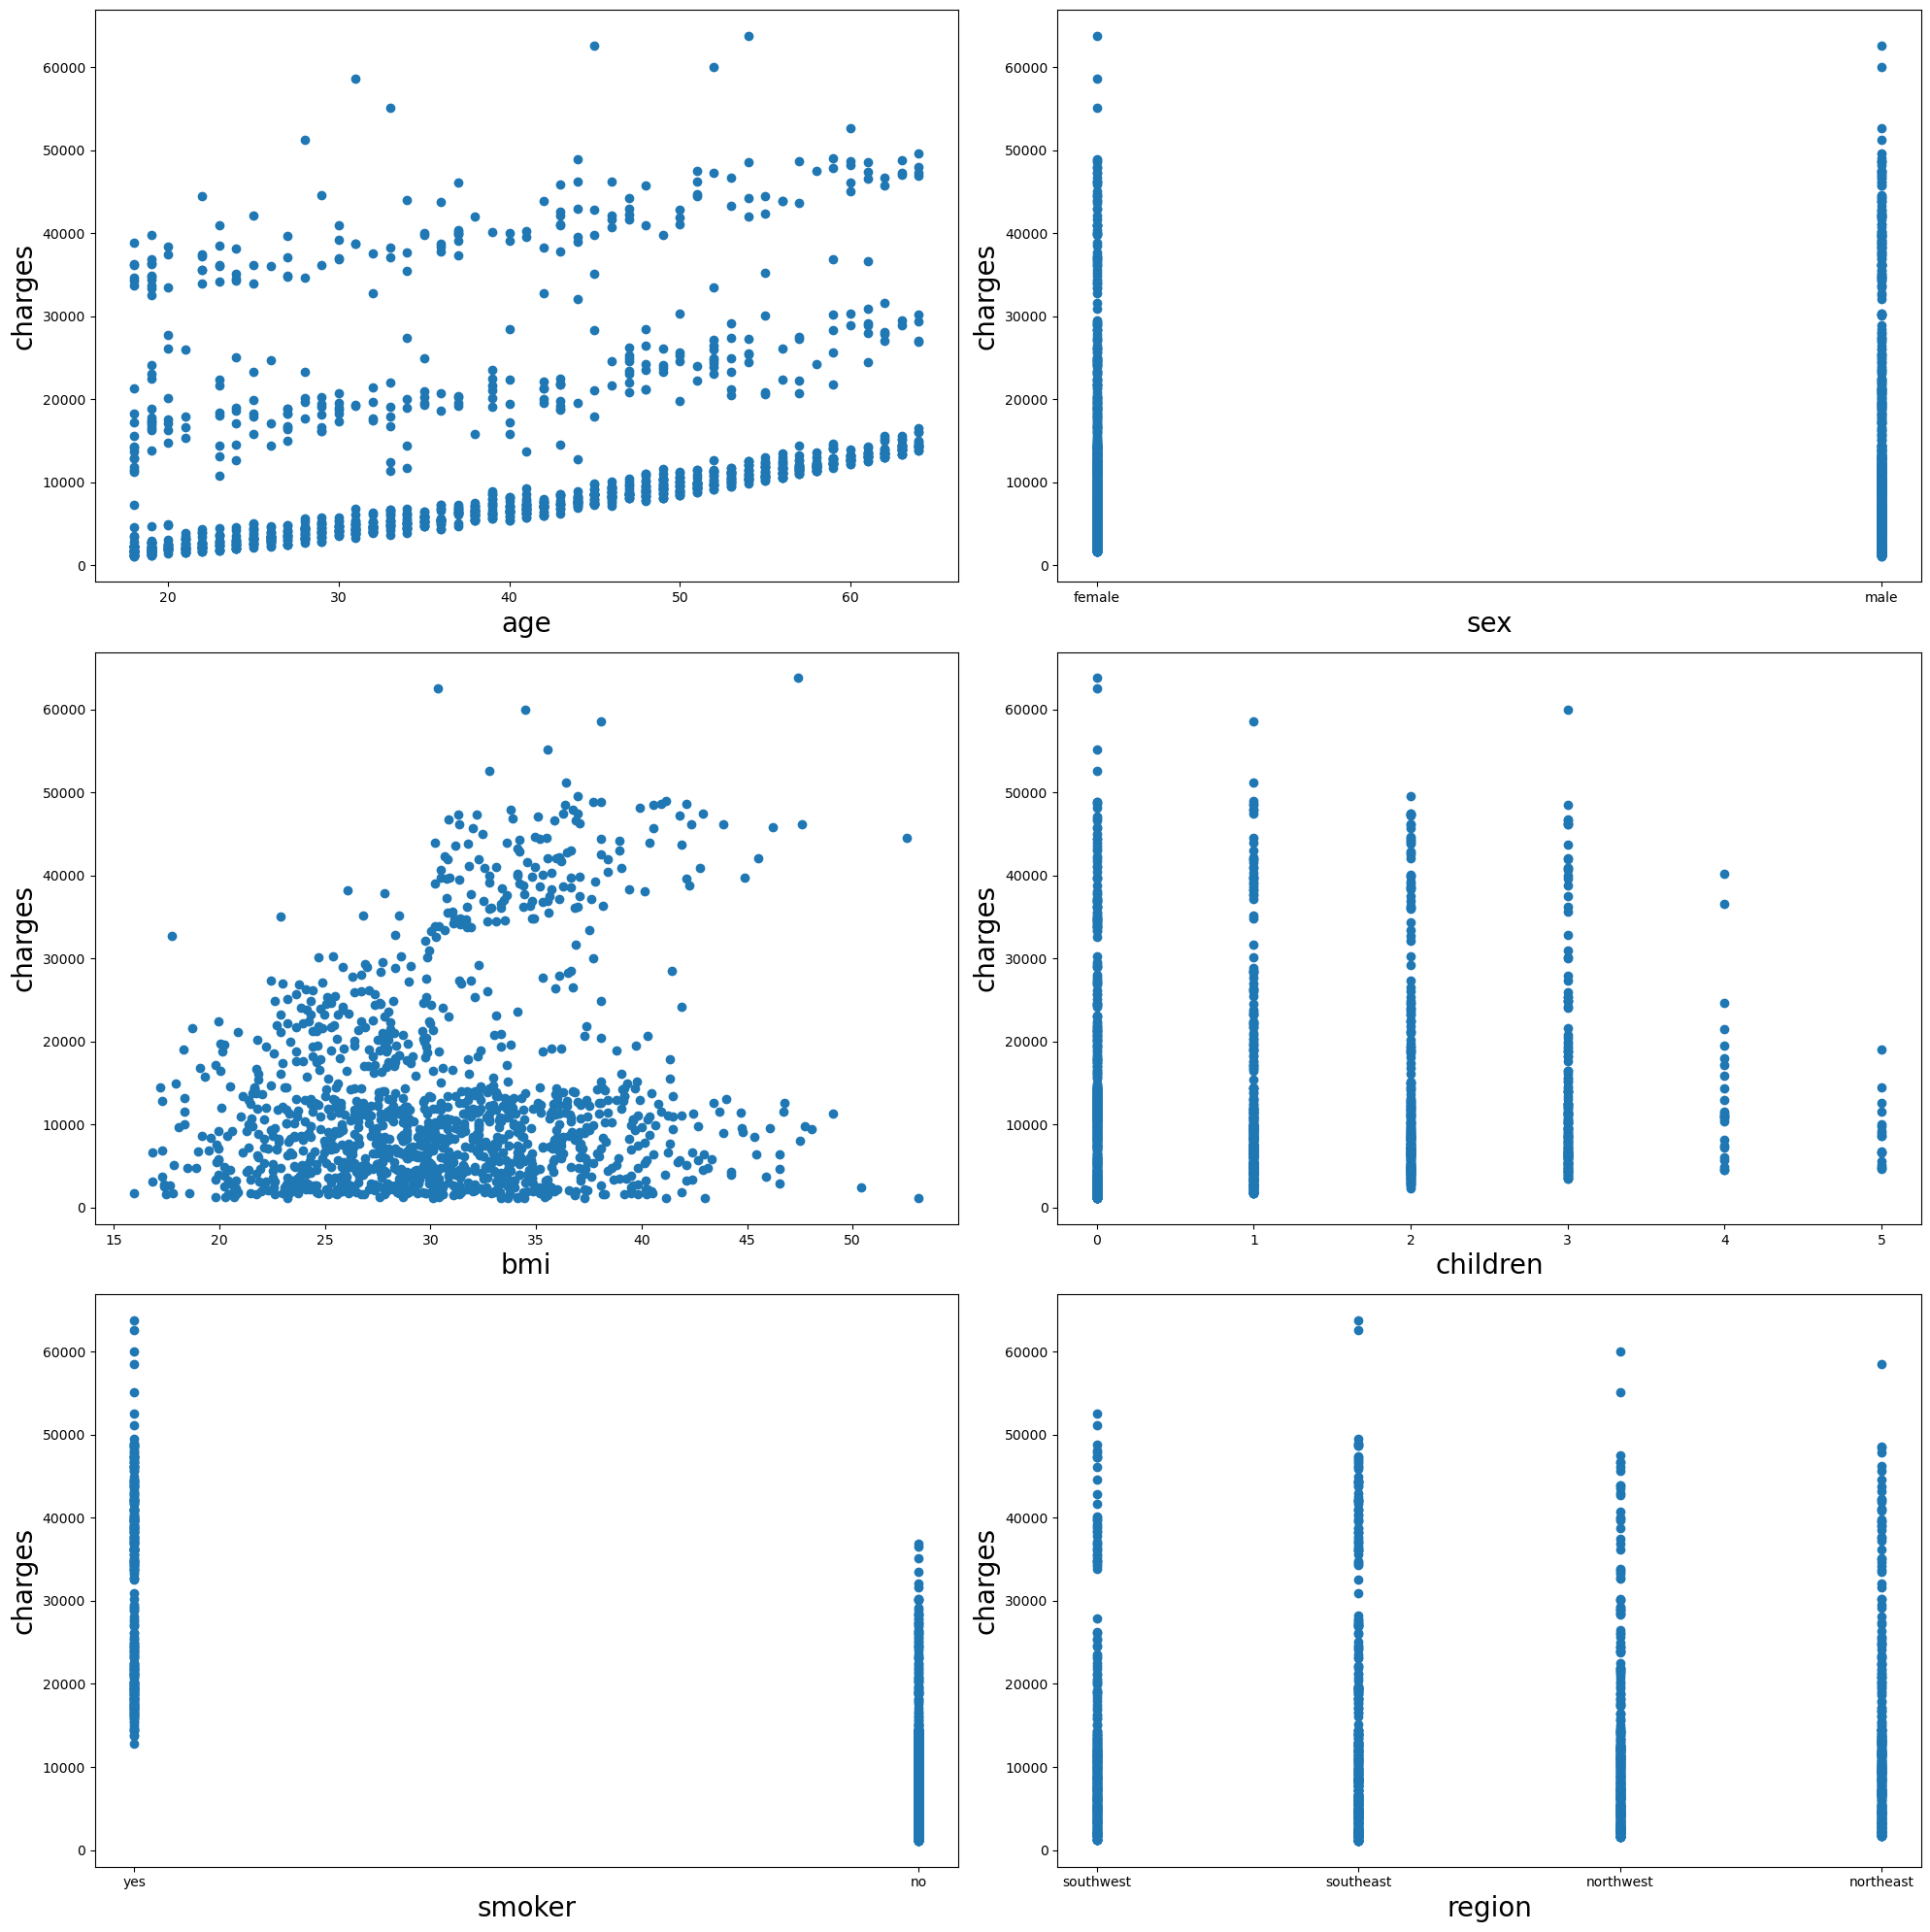

In [14]:
plt.figure(figsize=(20,20))
pn = 1
for column in df.drop(columns='charges'):
    ax=plt.subplot(3,2,pn)
    plt.scatter(df[column],df['charges'])
    plt.xlabel(column,fontsize = 20)
    plt.ylabel('charges',fontsize = 20)
    pn +=1
    
plt.tight_layout()  

<AxesSubplot: xlabel='age', ylabel='charges'>

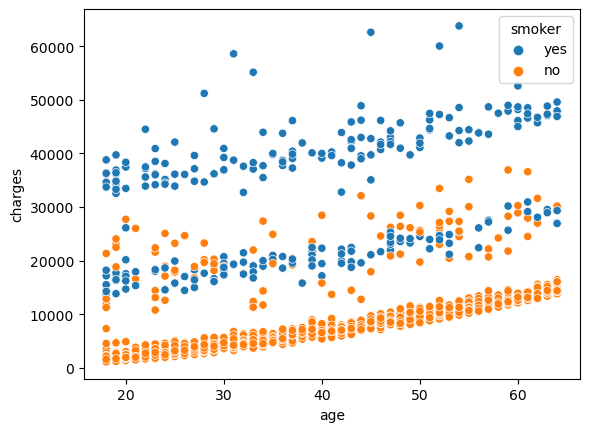

In [15]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')

- from above plot we can observe that there is positive relation between age and charges 
- non smokers are charged less as compared to smokers

<AxesSubplot: xlabel='sex', ylabel='charges'>

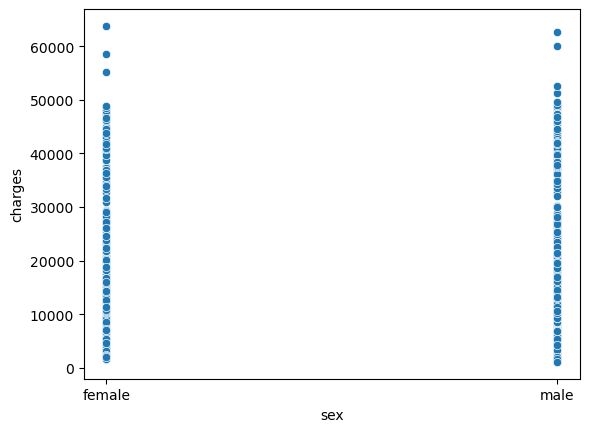

In [16]:
sns.scatterplot(data=df,x='sex',y='charges')

- we can observe that the data is equqlly distributed between male and female

<AxesSubplot: xlabel='bmi', ylabel='charges'>

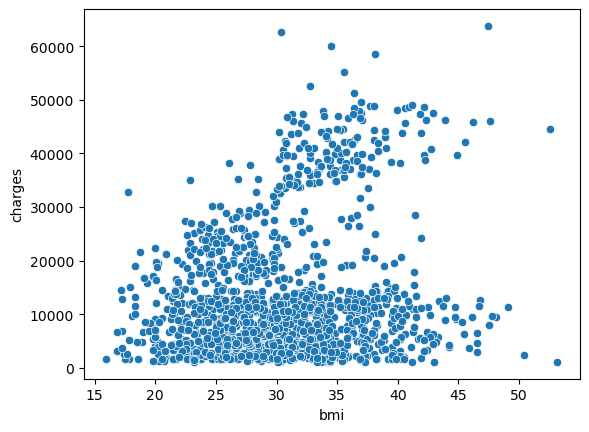

In [17]:
sns.scatterplot(data=df,x='bmi',y='charges')

- we can observe that there is less positive relation between charges and bmi

<AxesSubplot: xlabel='children', ylabel='charges'>

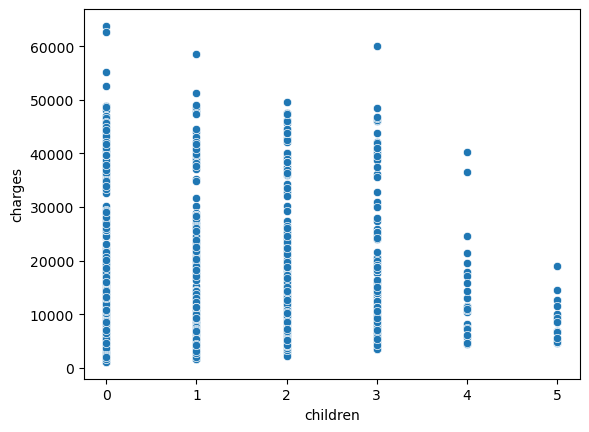

In [18]:
sns.scatterplot(data=df,x='children',y='charges')

- a slight negitive corelation can be seen in this graph

<AxesSubplot: xlabel='smoker', ylabel='charges'>

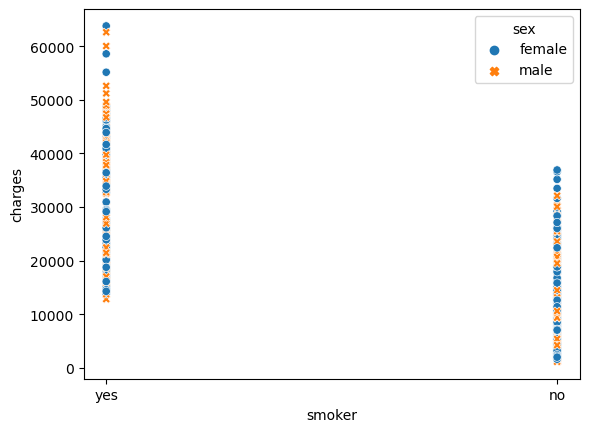

In [19]:
sns.scatterplot(data=df,x='smoker',y='charges',hue = 'sex',style='sex')

 - charges for smokers is high as compared to non smokers

<AxesSubplot: xlabel='region', ylabel='charges'>

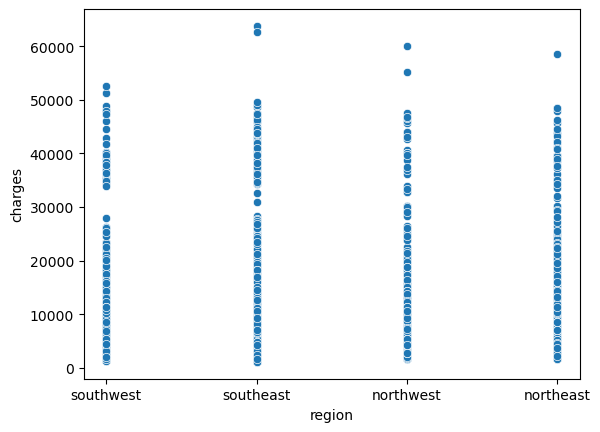

In [20]:
sns.scatterplot(data=df,x='region',y='charges')

- Data is equally distributed in each region

### Encoading catogerical data

In [21]:
data = df
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
# Labelencoader
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
df['smoker']=lenc.fit_transform(df['smoker'])
df['sex']=lenc.fit_transform(df['sex'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [23]:
# ordinal encoading using pd.getdummies
dummies = pd.get_dummies(df['region']) 
df.drop(columns='region',inplace=True)
df=df.join(dummies)
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


### outlier treatment

<AxesSubplot: ylabel='age'>

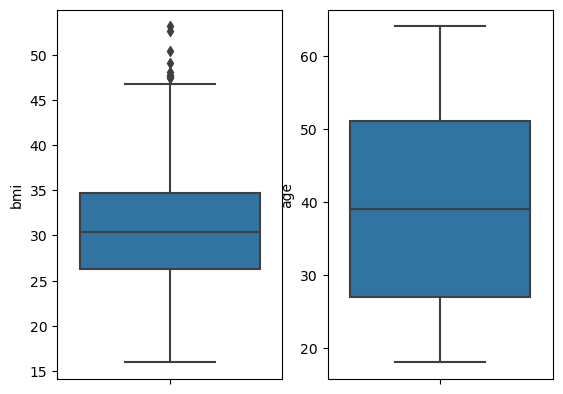

In [24]:
sns.boxplot(y=df['bmi'],ax=plt.subplot(1,2,1))
sns.boxplot(y=df['age'],ax=plt.subplot(1,2,2))

- We can observe that there are some outliers in bmi

In [25]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df['bmi']))
z[z>3].count()

4

In [26]:
out=df['bmi'][z<3]

In [27]:
df['bmi']= out

In [28]:
df = df.dropna()
df.reset_index(drop=True,inplace=True)
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1329,50,1,30.970,3,0,10600.54830,0,1,0,0
1330,18,0,31.920,0,0,2205.98080,1,0,0,0
1331,18,0,36.850,0,0,1629.83350,0,0,1,0
1332,21,0,25.800,0,0,2007.94500,0,0,0,1


### Skeweness

In [29]:
df[['age','bmi']].skew()

age    0.053603
bmi    0.205622
dtype: float64

- since skeweness in less than 0.5 no need to treat it

### corelation analysis

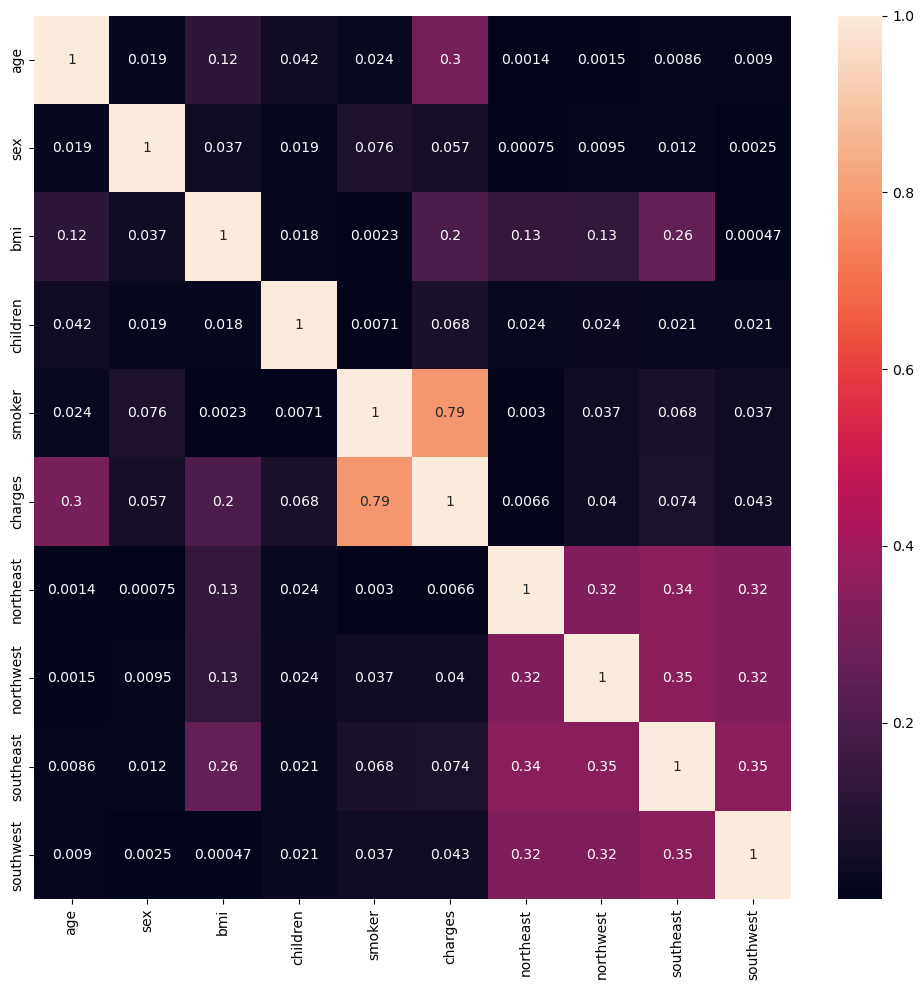

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

- There in no multicolinearity

### Standerdization

In [31]:
x=df.drop(columns='charges')
y=df['charges']

In [32]:
x

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1329,50,1,30.970,3,0,0,1,0,0
1330,18,0,31.920,0,0,1,0,0,0
1331,18,0,36.850,0,0,0,0,1,0
1332,21,0,25.800,0,0,0,0,0,1


In [33]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1329    10600.54830
1330     2205.98080
1331     1629.83350
1332     2007.94500
1333    29141.36030
Name: charges, Length: 1334, dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.44224939, -1.00752456, -0.4503585 , ..., -0.56753951,
        -0.60795547,  1.76199188],
       [-1.51352831,  0.99253164,  0.5281905 , ..., -0.56753951,
         1.64485731, -0.56753951],
       [-0.80073908,  0.99253164,  0.39982888, ..., -0.56753951,
         1.64485731, -0.56753951],
       ...,
       [-1.51352831, -1.00752456,  1.041637  , ..., -0.56753951,
         1.64485731, -0.56753951],
       [-1.29969154, -1.00752456, -0.80043566, ..., -0.56753951,
        -0.60795547,  1.76199188],
       [ 1.55146537, -1.00752456, -0.25531552, ...,  1.76199188,
        -0.60795547, -0.56753951]])

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [36]:
# finding best random state
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train_score = r2_score(y_train,pred_train)
    test_score = r2_score(y_test,pred_test)
    if round(train_score*100,1) == round(test_score*100,1):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_score*100,'Test accuracy':test_score*100},ignore_index=True)

    
tts_df.sort_values('Test accuracy',ascending=False)  


,Random state,Train accuracy,Test accuracy
6,754.0,74.981382,75.046522
3,210.0,74.987921,75.033353
7,766.0,75.011642,75.020958
9,919.0,75.012844,75.015598
2,118.0,74.953680,75.010397
8,783.0,75.036184,75.008667
4,463.0,74.973148,74.992292
1,43.0,75.014235,74.957727
10,975.0,74.937053,74.948522
5,476.0,74.889462,74.852491


- Therefore best random state is 754

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=754)

## Training models

#### Linear Regression

In [38]:
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    lr_r2_test_score = r2_score(y_test,pred_test)
    print(lr_r2_test_score*100,"%")

75.04652191549116 %


In [39]:
# Find best cv
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x_scaled,y,cv=i,scoring='r2')
    lr_cv_score_mean = lr_cv_score.mean()
    print('\ncv = ',i,'\nCross Validation score = ',round(lr_cv_score_mean*100,2),'%','\nr2 score = ',round(lr_r2_test_score*100,2),'%','\nDifference = ',round((lr_r2_test_score*100 - lr_cv_score_mean*100),2),'%',end = '\n\n')



cv =  2 
Cross Validation score =  74.86 % 
r2 score =  75.05 % 
Difference =  0.19 %


cv =  3 
Cross Validation score =  74.38 % 
r2 score =  75.05 % 
Difference =  0.67 %


cv =  4 
Cross Validation score =  74.58 % 
r2 score =  75.05 % 
Difference =  0.46 %


cv =  5 
Cross Validation score =  74.68 % 
r2 score =  75.05 % 
Difference =  0.37 %


cv =  6 
Cross Validation score =  74.52 % 
r2 score =  75.05 % 
Difference =  0.53 %


cv =  7 
Cross Validation score =  74.45 % 
r2 score =  75.05 % 
Difference =  0.6 %


cv =  8 
Cross Validation score =  74.27 % 
r2 score =  75.05 % 
Difference =  0.77 %


cv =  9 
Cross Validation score =  74.35 % 
r2 score =  75.05 % 
Difference =  0.7 %



- we are getting least differerence and good accurecy at cv=2 & 5 so let us choose cv = 5 for our next models
- since difference in all cases is less than 1% we can say our model in not over fitting

In [40]:
# getting result at cv = 5
lr_cv_score=cross_val_score(lr,x_scaled,y,cv=5,scoring='r2')
lr_cv_score_mean = lr_cv_score.mean()
print('\nCross Validation score = ',round(lr_cv_score_mean*100,2),'%','\nr2 score = ',round(lr_r2_test_score*100,2),'%','\nDifference = ',round((lr_r2_test_score*100 - lr_cv_score_mean*100),2),'%',end = '\n\n')



Cross Validation score =  74.68 % 
r2 score =  75.05 % 
Difference =  0.37 %



##### DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred_test = dtr.predict(x_test)
dtr_r2_test_score = r2_score(y_test,dtr_pred_test)
print(dtr_r2_test_score*100,"%")

72.32903843815575 %


In [42]:
# Cross validation at cv = 5
dtr_cv_score=cross_val_score(dtr,x_scaled,y,cv=5,scoring='r2')
dtr_cv_score_mean = dtr_cv_score.mean()
print('\nCross Validation score = ',round(dtr_cv_score_mean*100,2),'%','\nr2 score = ',round(dtr_r2_test_score*100,2),'%','\nDifference = ',round((dtr_r2_test_score*100 - dtr_cv_score_mean*100),2),'%',end = '\n\n')



Cross Validation score =  70.91 % 
r2 score =  72.33 % 
Difference =  1.42 %



##### RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred_test = rfr.predict(x_test)
rfr_r2_test_score = r2_score(y_test,rfr_pred_test)
print(rfr_r2_test_score*100,"%")

82.89996539033594 %


In [44]:
# Cross validation at cv = 5
rfr_cv_score=cross_val_score(rfr,x_scaled,y,cv=5,scoring='r2')
rfr_cv_score_mean = rfr_cv_score.mean()
print('\nCross Validation score = ',round(rfr_cv_score_mean*100,2),'%','\nr2 score = ',round(rfr_r2_test_score*100,2),'%','\nDifference = ',round((rfr_r2_test_score*100 - rfr_cv_score_mean*100),2),'%',end = '\n\n')



Cross Validation score =  83.52 % 
r2 score =  82.9 % 
Difference =  -0.62 %



#### AdaBoostRegressor

In [45]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred_test = abr.predict(x_test)
abr_r2_test_score = r2_score(y_test,abr_pred_test)
print(abr_r2_test_score*100,"%")

77.5029686420585 %


In [46]:
# Cross validation at cv = 5
abr_cv_score=cross_val_score(abr,x_scaled,y,cv=5,scoring='r2')
abr_cv_score_mean = abr_cv_score.mean()
print('\nCross Validation score = ',round(abr_cv_score_mean*100,2),'%','\nr2 score = ',round(abr_r2_test_score*100,2),'%','\nDifference = ',round((abr_r2_test_score*100 - abr_cv_score_mean*100),2),'%',end = '\n\n')



Cross Validation score =  82.23 % 
r2 score =  77.5 % 
Difference =  -4.72 %



#### GradientBoostingRegressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred_test = gbr.predict(x_test)
gbr_r2_test_score = r2_score(y_test,gbr_pred_test)
print(gbr_r2_test_score*100,"%")

84.52803474091999 %


In [48]:
# Cross validation at cv = 5
gbr_cv_score=cross_val_score(gbr,x_scaled,y,cv=5,scoring='r2')
gbr_cv_score_mean = gbr_cv_score.mean()
print('\nCross Validation score = ',round(gbr_cv_score_mean*100,2),'%','\nr2 score = ',round(gbr_r2_test_score*100,2),'%','\nDifference = ',round((gbr_r2_test_score*100 - gbr_cv_score_mean*100),2),'%',end = '\n\n')



Cross Validation score =  85.34 % 
r2 score =  84.53 % 
Difference =  -0.81 %



#### XGBRegressor

In [49]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
xgbr_pred_test = xgbr.predict(x_test)
xgbr_r2_test_score = r2_score(y_test,xgbr_pred_test)
print(xgbr_r2_test_score*100,"%")

80.06410945907567 %


In [50]:
# Cross validation at cv = 5
xgbr_cv_score=cross_val_score(xgbr,x_scaled,y,cv=5,scoring='r2')
xgbr_cv_score_mean = xgbr_cv_score.mean()
print('\nCross Validation score = ',round(xgbr_cv_score_mean*100,2),'%','\nr2 score = ',round(xgbr_r2_test_score*100,2),'%','\nDifference = ',round((xgbr_r2_test_score*100 - xgbr_cv_score_mean*100),2),'%',end = '\n\n')



Cross Validation score =  81.09 % 
r2 score =  80.06 % 
Difference =  -1.02 %



- From above results we can observe that GradientBoostingRegressor is giving maximum r2 score with minimum overfitting therefor it is best model for this data set

### Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
grid_parm = {'max_depth':[2,3,4,5],
             'learning_rate':[0.01,0.05,0.02,0.1,0.2,0.5],
             'criterion':['friedman_mse', 'squared_error', 'mae'],
             'n_estimators':[100,110,120,130],}

In [52]:
gcv = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=grid_parm,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 130}

In [53]:
final_model = GradientBoostingRegressor(learning_rate= 0.05,max_depth= 2,n_estimators= 130,criterion='friedman_mse')
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)

In [54]:
r2 = r2_score(y_test, final_model_test_pred)
print('\nR2 Score = ',r2)


R2 Score =  0.854038773936777


Text(0.5, 1.0, 'Actual vs Predicted')

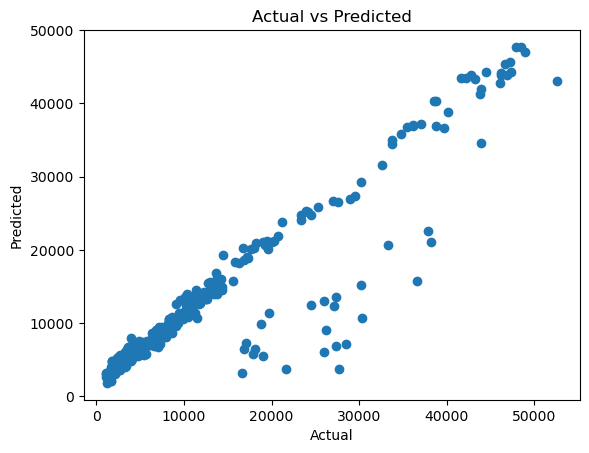

In [55]:
plt.scatter(y_test, final_model_test_pred)
plt.ylabel("Predicted")
plt.xlabel('Actual')
plt.title('Actual vs Predicted')

### Saving Model

In [56]:
import pickle
with open('final_gb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### Conclusion

##### From above graph and r2 scrore  we can say that our model can accurately predict around 85.40% data